In [1]:
# !pip install pytube==10.4.1
from pytube import YouTube
# misc
import os
import shutil
import math
import datetime
# plots
import matplotlib.pyplot as plt
%matplotlib inline
# image operation
import cv2

In [2]:
# thanks to the Medium article 
# https://towardsdatascience.com/the-easiest-way-to-download-youtube-videos-using-python-2640958318ab
video = YouTube('https://www.youtube.com/watch?v=OHl_0s4qqUY&ab_channel=umnSAFL')

In [3]:
video.streams.filter(file_extension = "mp4").all()

/home/user/miniconda3/envs/openpiv/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated function all (This object can be treated as a list, all() is useless).
  """Entry point for launching an IPython kernel.


[<Stream: itag="18" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">,
 <Stream: itag="135" mime_type="video/mp4" res="480p" fps="30fps" vcodec="avc1.4d401e" progressive="False" type="video">,
 <Stream: itag="134" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.4d401e" progressive="False" type="video">,
 <Stream: itag="133" mime_type="video/mp4" res="240p" fps="30fps" vcodec="avc1.4d400d" progressive="False" type="video">,
 <Stream: itag="160" mime_type="video/mp4" res="144p" fps="30fps" vcodec="avc1.4d400c" progressive="False" type="video">,
 <Stream: itag="140" mime_type="audio/mp4" abr="128kbps" acodec="mp4a.40.2" progressive="False" type="audio">]

In [4]:
video.streams.get_by_itag(135).download()

/home/user/miniconda3/envs/openpiv/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'/home/user/Downloads/repos/openpiv-python/openpiv/examples/notebooks/Super-Large-Scale Flow Visualization with Snow.mp4'

In [5]:
class FrameExtractor():
    '''
    Class used for extracting frames from a video file.
    '''
    def __init__(self, video_path):
        self.video_path = video_path
        self.vid_cap = cv2.VideoCapture(video_path)
        self.n_frames = int(self.vid_cap.get(cv2.CAP_PROP_FRAME_COUNT))
        self.fps = int(self.vid_cap.get(cv2.CAP_PROP_FPS))
        
    def get_video_duration(self):
        duration = self.n_frames/self.fps
        print(f'Duration: {datetime.timedelta(seconds=duration)}')
        
    def get_n_images(self, every_x_frame):
        n_images = math.floor(self.n_frames / every_x_frame) + 1
        print(f'Extracting every {every_x_frame} (nd/rd/th) frame would result in {n_images} images.')
        
    def extract_frames(self, every_x_frame, img_name, dest_path=None, img_ext = '.jpg'):
        if not self.vid_cap.isOpened():
            self.vid_cap = cv2.VideoCapture(self.video_path)
        
        if dest_path is None:
            dest_path = os.getcwd()
        else:
            if not os.path.isdir(dest_path):
                os.mkdir(dest_path)
                print(f'Created the following directory: {dest_path}')
        
        frame_cnt = 0
        img_cnt = 0

        while self.vid_cap.isOpened():
            
            success,image = self.vid_cap.read() 
            
            if not success:
                break
            
            if frame_cnt % every_x_frame == 0:
                img_path = os.path.join(dest_path, ''.join([img_name, '_', str(img_cnt), img_ext]))
                cv2.imwrite(img_path, image)  
                img_cnt += 1
                
            frame_cnt += 1
        
        self.vid_cap.release()
        cv2.destroyAllWindows()

In [6]:
fe = FrameExtractor('/home/user/Downloads/repos/openpiv-python/openpiv/examples/notebooks/Super-Large-Scale Flow Visualization with Snow.mp4')

In [7]:
fe.get_video_duration()


Duration: 0:01:01.034483


In [29]:
fe.get_n_images(every_x_frame=4)

Extracting every 4 (nd/rd/th) frame would result in 443 images.


In [30]:
fe.extract_frames(every_x_frame=4, 
                  img_name='test', 
                  dest_path='test_images')

Created the following directory: test_images


error: OpenCV(3.4.2) /tmp/build/80754af9/opencv-suite_1535558553474/work/modules/highgui/src/window.cpp:626: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Carbon support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


In [31]:
import os, glob, re

image_list = glob.glob('./test_images/test_*.jpg')
image_list.sort(key=lambda x:float(re.findall("(\d+)",x)[0]))
# print(image_list)

<>:4: DeprecationWarning: invalid escape sequence \d
<>:4: DeprecationWarning: invalid escape sequence \d
<>:4: DeprecationWarning: invalid escape sequence \d
<ipython-input-31-286d6cf9de37>:4: DeprecationWarning: invalid escape sequence \d
  image_list.sort(key=lambda x:float(re.findall("(\d+)",x)[0]))


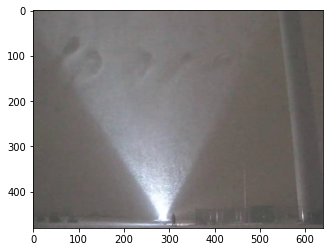

In [32]:
import matplotlib.pyplot as plt
import imageio
from openpiv.piv import simple_piv

plt.imshow(imageio.imread(image_list[130]))

/home/user/miniconda3/envs/openpiv/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
130


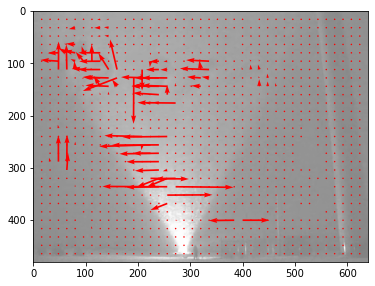

131


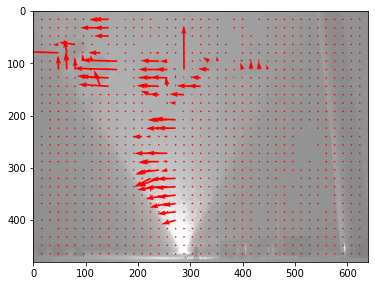

132


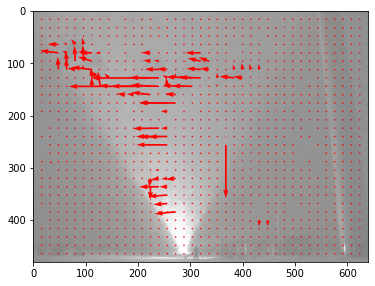

133


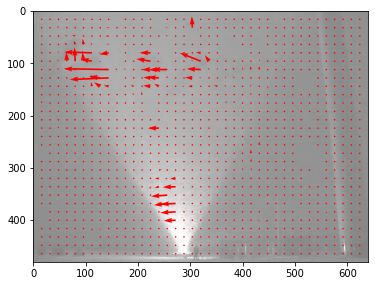

In [39]:
import numpy as np

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

for i in range(130, 134, 1):
    print(i)
    a = rgb2gray(imageio.imread(image_list[i]))
    b = rgb2gray(imageio.imread(image_list[i+1]))
    # plt.figure()
    # plt.imshow(np.sum(a,axis=2),cmap='gray')
    # plt.figure()
    # plt.imshow(np.sum(b,axis=2),cmap='gray')
    simple_piv(a, b)

In [41]:
import shutil
shutil.rmtree('./test_images')

/home/user/miniconda3/envs/openpiv/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
